<center><h1>Recherche Textuelle : Algorithme de Boyer-Moore</h1><center>

### Introduction <a id="chapter1"></a>

Rechercher une chaîne de caractères dans une autre est un problème récurrent, que ce soit en informatique ou dans d'autres sciences comme par exemple en génétique, dès lors qu'il s'agit de localiser un motif dans une séquence d'ADN.

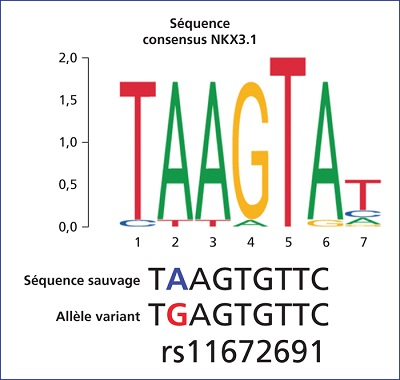

***Vers le Grand Oral:***
*Faire une petite recherche sur les Web Crawlers, donner quelques exemples et expliquer leur mode de fonctionnement. En quoi notre chapitre s'en rapproche-t-il ?*

Dans ce chapitre, on va s'intéresser au problème de la recherche des occurences d'une chaîne de caractères, que l'on appelera `motif` dans une autre chaîne de caractères, que l'on appellera `texte`.

Par exemple, il y a deux occurences du motif `"bra"` dans le texte `"abracadabra"`.

Plus précisément, on va chercher à quelles positions dans le texte le motif apparaît.

!!! tip Rappels sur les textes

Une chaîne de caractères peut être écrite au choix entre apostrophes ou entre guillements.
Ainsi, on peut écrire indifféremment `'abracadabra'` ou `"abracadabra"`.

* La longueur d'une chaîne `s` est obtenue avec `len(s)`. 
* Les caractères sont numérotés à partir de 0. 
* Le `i+1`-ième caractère est obtenu avec `s[i]`.
* La sous-chaîne de `s` contenant les caractères `i` inclus à `j` exclu est obtenu avec `s[i:j]`. Il s'agit d'une nouvelle chaîne de caractère, la chaine `s` n'étant pas modifiée. Les caractères et les chaînes peuvent être comparées avec l'opérateur `==`.
!!!

!!! question Un premier exercice
Complétez le code ci-dessous qui réutilise les notions sur les chaînes de caractères.
Si vous n'y arrivez pas, relisez bien le rappel ci dessus, sinon **Appelez un camarade ou le professeur**
!!!

In [ ]:
texte = "Python est un langage de programmation."

# Complétez les trous ci-dessous en utilisant les indices et les tranches

# Récupérez le premier mot en utilisant une tranche sur la chaîne texte
trou1 = texte[:...]

# Récupérez le mot langage
trou2 = texte[...:...]

# Récupérez la longueur du texte
trou3 = ...

# Récupérez la lettre h
trou4 = texte[...]

# Assertions pour vérifier les réponses
assert trou1 == "Python"
assert trou2 == "langage"
assert trou3 == 39
assert trou4 == "h"

print("Toutes les assertions ont réussi. Bravo !")

### Rappel sur la partie vue en cours

On note `m` de longueur $p$ le motif que l'on cherche et `t` de longueur $n$ le texte dans lequel on le recherche.

Une première observation est qu'il ne peut y avoir une occurence de `m` dans t que si $p \leq n$.

Plus précisément, une occurence de `m` dans `t` à la position $i$ est contrainte par l'inégalité $0 \leq i \leq n-p$.

Il peut être utile de se représenter une occurence de `m` dans `t` à la position $i$ comme ceci :

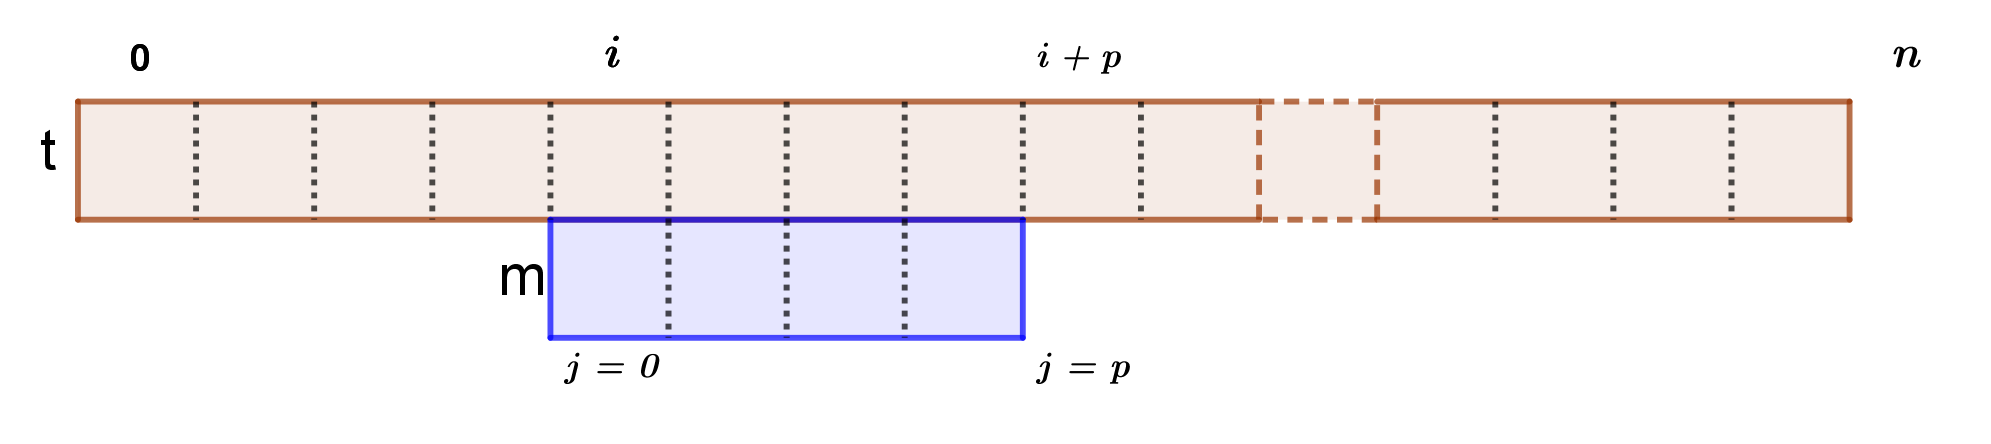

Au dessus, on a représenté les indices des caractères du texte, qui vont de 0 inclus à $n$ exclu.
En dessous, on a représenté les indices des caractères du motif, qui vont de 0 inclus à $p$ exclu.

S'il y a une occurence à la position $i$, alors les caractères t[$i$],...,t[$i+p-1$] du texte coïncident avec les caractères m[$0$],...,m[$p-1$] du motif.

* Nous notons donc $i$ la position de la fenêtre dans `t` : c’est l’index du premier caractère du texte qui apparaît dans la fenêtre.
* Nous notons $j$ l’index dans `m` du caractère du motif que nous comparons avec son analogue du texte : on compare m[$j$] avec t[$i+j$].
* La recherche peut se faire à condition que $i+p \leq n$ puisque les caractères du texte qui apparaissent dans la fenêtre ont pour index $i, i + 1, …, i + p − 1$.

## II. La méthode `find` de Python

Le site http://www.gutenberg.org/browse/languages/fr propose les grands classiques de la littérature qui sont tombés dans le domaine public.
On peut par exemple y trouver le texte intégral du roman Le rouge et le noir de Stendhal dans l’encodage UTF-8 : http://www.gutenberg.org/ebooks/798.txt.utf-8 .

On pourra alors charger en mémoire ce roman par ces quelques lignes pour chercher ensuite si le motif `'Julien trembla'` apparaît quelque part dans le roman.

### 1. Prise en main<a class="anchor" id="section_3_1"></a>

!!! question Exercice 1
Expliquez briévement les trois lignes ci-dessous en vous appuyant sur le cours de 1ere (https://fabricenativel.github.io/Premiere/pdf/C7/C7-cours.pdf diaporama 25)
!!!

In [ ]:
fichier = open('RougeEtNoir-utf8.txt', 'r')
stendhal = fichier.read()
fichier.close()

* Déterminer la taille totale du texte.

* Faites une petite recherche pour savoir comment utiliser la méthode <code>find</code> de Python.

* Cherchez maintenant l’indice de la première position du motif <code>'Julien trembla'</code> dans le texte du roman.

* Pouvez-vous donner la suite et la fin de la phrase qui commence par <code>'Julien trembla'</code> ?

??? tip Une solution avec un autre motif

Tout d'abord on ouvre le fichier et on copie **tout son contenu** dans la variable `stendhal`, ensuite on ferme le fichier.
```python
fichier = open('LeRougeEtLeNoir.txt', 'r')
stendhal = fichier.read()
fichier.close()
```

Pour afficher la taille, on utilise la fonction `len` en lui donnant en argument le nom de notre variable: `len(stendhal)`.
Attention, cette instruction compte aussi bien les espaces, la ponctuation que les lettres.

Avec `help(find)` dans une cellule python on peut lire que la méthode `find` s'appelle avec un texte en argument et qu'elle renvoit **l'indice de la première occurence du motif** ou bien **-1** si celui ci n'est pas présent dans le texte.

L'indice de la première occurence du prénom `Julien` est donc: 
```python
prems = stendhal.find('Julien')
```

Pour trouver la suite et la fin de la phrase, on doit utiliser une tranche sur le texte : `stendhal[...:....]`.

On sait que le premier caractère après le prénom est celui situé 6 indices après (`len('Julien') == 6`).
La tranche commence donc à `prems+6`.

La tranche finit au premier **.** situé après `prems`, il faut donc trouver l'indice de ce **.**.

Pour cela on va utiliser la méthode `find` mais uniquement sur le texte après `prems+6`:

```python
texte_après_prems = stendhal[prems+6:]
indice_point = texte_après_prems.find('.')
```

On a maintenant l'indice de début (`prems+6`) et l'indice de fin (`indice_point`), pour afficher la suite et fin de la phrase:

```python
print(stendhal[prems+6:indice_point+1])
```

On a ajouté le +1 car on veut voir le point, il faut donc l'inclure.

???

#### Remarque :
La convention choisie par la méthode find est de renvoyer la valeur −1 dans le cas où le motif n’apparaît pas du tout dans le texte. 
Par exemple <code>stendhal.find('Joséphine')</code> renvoie −1 : le prénom Joséphine n’apparaît jamais dans le roman.

!!! question Votre nom apparait-il dans le roman ?
Testez le en complétant le code ci-dessous !
!!!

In [ ]:
indice_prenom = ...
if ... != ...:
    print("Je suis dans le roman !")
else:
    print("Le roman n'a aucun intérêt.")

### 2. Prolongement au nombre d'occurences<a class="anchor" id="section_3_2"></a>

Une variante de la méthode <code>find</code> a deux arguments, le premier correspondant toujours au motif recherché et le deuxième précisant la position de départ de la recherche.

!!! question Exercice 2
* Ecrire la fonction <code>nbOccurences</code> qui calcule le nombre d’occurrences d’un motif dans un texte à l'aide de la méthode <code>find</code>.
!!!

??? tip Un code à trou
```python
def nbOccurences(texte,motif)
    compteur = ... 
    i = ...
    
    while ...: 
        occurence = ...
        # occurence est l'indice auquel on a trouvé motif, dans texte, à partir de l'indice i, ou -1.
        if occurrence != ...:
            ... 
            i = ... 
        else: 
            i = ...
    return ... 
```
???


??? tip Pour vous aider si vous bloquez
Voici le code commenté

```python
def nbOccurences(texte,motif)
    compteur = ... #Combien de fois motif apparait-il avant d'avoir lu le texte ?
    i = ... #À quel indice motif peut-il apparaître en premier ?
    
    while ...: # Tant que i est un indice valide (ni négatif, ni plus grand que le texte)
        occurence = ... 
        # occurence est l'indice auquel on a trouvé motif, dans texte, à partir de l'indice i, ou -1.
        if occurrence != ...:
            ... # On augmente le compteur de 1
            i = ... # i doit être positionné à la fin du motif débutant à occurence
        else: # on a pas trouvé d'occurence, il faut mettre à jour i.
            i = ...
    return ... # On renvoit le nombre d'occurences de motif.
```
???

In [ ]:
def nbOccurences(texte, motif):
    '''
    Compte le nombre d'occurrences de motif dans texte en appelant find tant que l'on trouve le motif.
    '''
    pass

* Tester votre fonction pour savoir si le mot 'amour' est écrit plus souvent que le mot 'mort' dans le roman Le Rouge et le Noir.

??? tip Indice
amour est bien écrit plus de fois.
???

## III. Un premier algorithme simple et naïf

L’algorithme naïf consiste simplement à comparer un à un, de gauche à droite, les caractères du texte apparaissant dans la fenêtre avec ceux du motif.

En cas de non-correspondance on avance simplement la fenêtre d’une unité vers la droite.
Par exemple, dans la situation suivante,

on compare le <code>'a'</code> du motif avec le <code>'r'</code> du texte, obtenant immédiatement une différence : on peut avancer la fenêtre en incrémentant $i$, qui passe de 14 à 15.

Dans la nouvelle fenêtre, le premier caractère coïncide bien :

et on incrémente $j$ pour tester les caractères suivants, <code>'d'</code> et <code>'c'</code> :

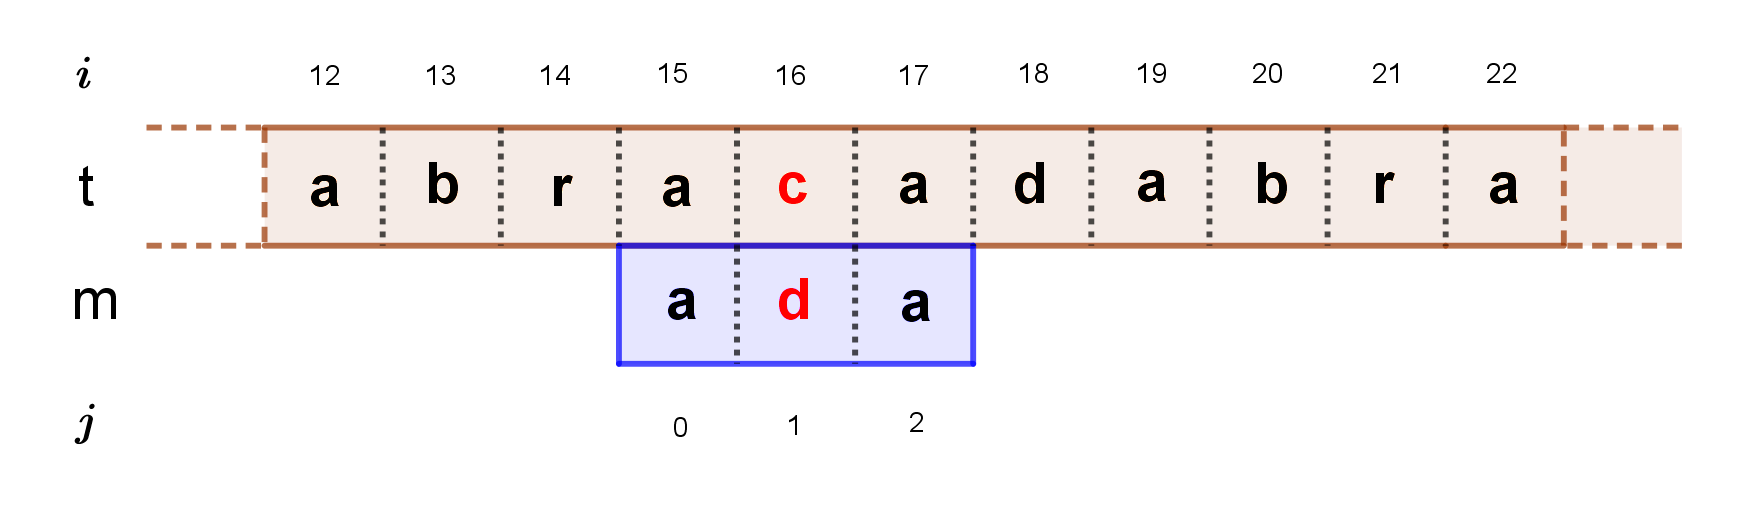

On est à nouveau en situation d’échec. Il faut donc décaler notre motif, et on effectue donc $i = i + 1$ et $j = 0$.

### 1. Implémentation de l'algorithme naïf<a class="anchor" id="section_4_1"></a> 

!!! question Implémentez deux fonctions pour effectuer cette recherche de motif dans un texte.
* `occurence` qui prend en paramètres le motif, le texte et un indice puis renvoie True s'il y a une occurence de la chaîne m dans la chaîne t à la position i ;
* `recherche_naif` qui prend en paramètres le motif m et le texte t puis affiche toutes les occurences de m dans t.
!!!

Pour vous aider, voici deux indices pour la fonction occurence.

??? tip Un code à trou
```python
def occurence(motif,texte,indice):
    '''indique s'il y a une occurence de la chaîne motif dans la chaîne texte à la position indice'''
    # Si l'indice n'est pas valide, on peut renvoyer faux directement.
    if ... :
        return ...
    
    # Sinon, on peut parcourir la chaine motif en parallèle de la chaine texte.
    for j in range(...):
        if texte[...] != motif[...]:
            return ...
    ...
```
???

??? tip Des indications plus précises
* L'indice est invalide s'il est négatif, ou s'il est trop loin pour contenir le motif entier. Pour le deuxième cas, on devra donc vérifier que indice est plus petit que le dernier indice possible où motif peut être (faites un dessin).
* Notre variable `j` permet de parcourir la longueur du `motif`.
* L'indice de la lettre correspondante dans le texte est le même, mais additionné à `indice`
* On renvoit `True` uniquement si on a réussi à sortir de la boucle `for`
???

Pour la fonction `recherche_naif`, vous devez utiliser la fonction `occurence`.

??? tip Un dernier pour la route
```python
def recherche_naif(motif,texte):
    '''renvoie l'indice de la première occurence de motif dans texte.'''
    
    for indice in range(...):
        if ...:
            return ...
    return ...
```
???

In [ ]:
texte="abdabrababdraabradbabracadabraabaadaabracadabrarabadaraabracadabraadraba"
motif="abracadabra"

recherche_naif(motif,texte)

Combien de comparaisons ont-elles été faites pour trouver ce résultat ?

### 2. Complexité temporelle<a class="anchor" id="section_4_2"></a>

L'objectif premier d'un calcul de complexité algorithmique est de pouvoir comparer l’efficacité d’algorithmes résolvant le même problème. Dans une situation donnée, cela permet donc d'établir lequel des algorithmes disponibles est le plus optimal.

Ce type de question est primordial, car pour des données volumineuses la différence entre les durées d'exécution de deux algorithmes ayant la même finalité peut être de l'ordre de plusieurs jours.

Avant de se pencher de manière théorique sur la complexité temporelle, nous allons comparer brièvement la complexité des algorithmes de recherche vus depuis le début de ce cours.
(Re-)Parlons maintenant du module time de Python, testez le programme suivant :

In [ ]:
import time
debut = time.time()

In [ ]:
# On attend quelques secondes avant de taper la commande suivante
fin = time.time()
print(debut < fin)
print(fin - debut) # Combien de secondes entre debut et fin ?

Comparer temporellement maintenant la méthode <code>find</code> de Python et notre algorithme de recherche Naïf sur l'exemple de départ :"Julien trembla" dans le roman "Le rouge et le noir".

??? tip Comment faire ?

On peut mesurer le temps écoulé pour exécuter une fonction ainsi:
```python
debut = time.time()
ma_fonction(bidule,chouette,truc)
fin = time.time()
print(fin-debut)
```

Ici on va faire cela pour les deux fonctions et comparer les résultats affichés nous même.
???

In [ ]:
# Ici votre code pour comparer les deux exécutions.

L'un semble beaucoup plus rapide que l'autre, il semble donc important d'accélérer notre algorithme de recherche !

#### Pour aller plus loin

On pourrait tracer la courbe du temps passé en fonction de la taille du texte.
Pour que cela influe il faudrait cependant un motif qui n'est pas présent dans le texte.

Voici un extrait de code à compléter pour tracer cette courbe et vérifier que les deux algorithmes ne vont pas à la même vitesse du tout:

In [ ]:
import matplotlib.pyplot as plt
import time

def temps_find(texte, motif):
    longueurs_texte = range(1, len(texte)+1,100) # On incrémente de 100 pour ne pas avoir trop de points.
    temps = []
    for l in longueurs_texte:
        sous_texte = texte[:l]
        debut = time.time()
        ### Ici on appelle notre fonction à mesurer
        sous_texte.find(motif)
        ###
        fin = time.time()
        temps.append(fin - debut)
    return longueurs_texte, temps

def temps_naif(texte,motif):
    #À vous de compléter pour obtenir les points avec votre fonction de recherche
    pass


texte = "abracadabra" * 1000  # Exemple de texte
motif = "cobra"  # Exemple de motif à trouver, on n'en prend un non présent pour être sûr de voir tout le texte.

longueurs_texte, temps = temps_find(texte, motif)


plt.clf()
plt.plot(longueurs_texte, temps,'ro') # On affiche en rouge find, pour afficher en bleu on peut utiliser 'bo'
# Affichez ici votre temps.
plt.xlabel('Longueur du texte')
plt.ylabel('Temps (s)')
plt.title('Temps pris par find pour trouver un motif dans un texte')
plt.show()

## Boyer-Moore version simplifiée de Horspool

### Une première idée pour accélérer la recherche

* L'idée est d'améliorer la recherche en utilsant certaines <strong>heuristiques</strong> dont nous détaillerons la première.
* L'algorithme est aussi à fenêtre glissante comme dans la recherche naïve mais la comparaison du motif avec le texte, <code>m[0:p-1]</code> avec <code>t[i:i+p-1]</code>, se fait <strong>de droite à gauche</strong>, en commençant par la fin !
* La première heuristique, souvent appelée celle du "mauvais caractère", va tirer parti du parcours inversé en testant d'abord s'il y a correspondance pour le dernier caractère du motif.
* Par exemple dans la recherche suivante de <code>m</code> dans <code>t</code>:

On voit que "e" et "u" ne correspondent pas. Comme "u" n'apparaît pas dans le motif, nous pouvons faire glisser le motif vers la droite de sa propre longueur (ici 7) en étant sûr de ne manquer aucune correspondance. 

Et même si le caractère de <code>t</code> apparaît ailleurs dans <code>m</code>, lorsque l'on fait la comparaison t[$i$+$j$]==m[$j$], si t[$i$+$j$]=a ne correspond pas.

On aligne alors **l'occurence la plus à droite de a  dans m[$0:p-1$] avec t[$i$+$j$]**.

### 2. Déroulement de l'algorithme<a class="anchor" id="section_6_2"></a>

!!! question Un exemple à faire à la main

Appliquer l'algorithme vu précedemment à l'exemple suivant en déroulant les étapes à la main et en commençant à appréhender son codage futur.

Une fois cela fait, répondez aux questions suivantes.

* Que faire si la lettre du texte n'apparaît pas dans le motif ? 
* Dans quel cas le décalage est-il le moins important ?
* Chaque décalage fait est-il unique ?
* Que pourrait-on faire avant de commencer les comparaisons ?

!!!

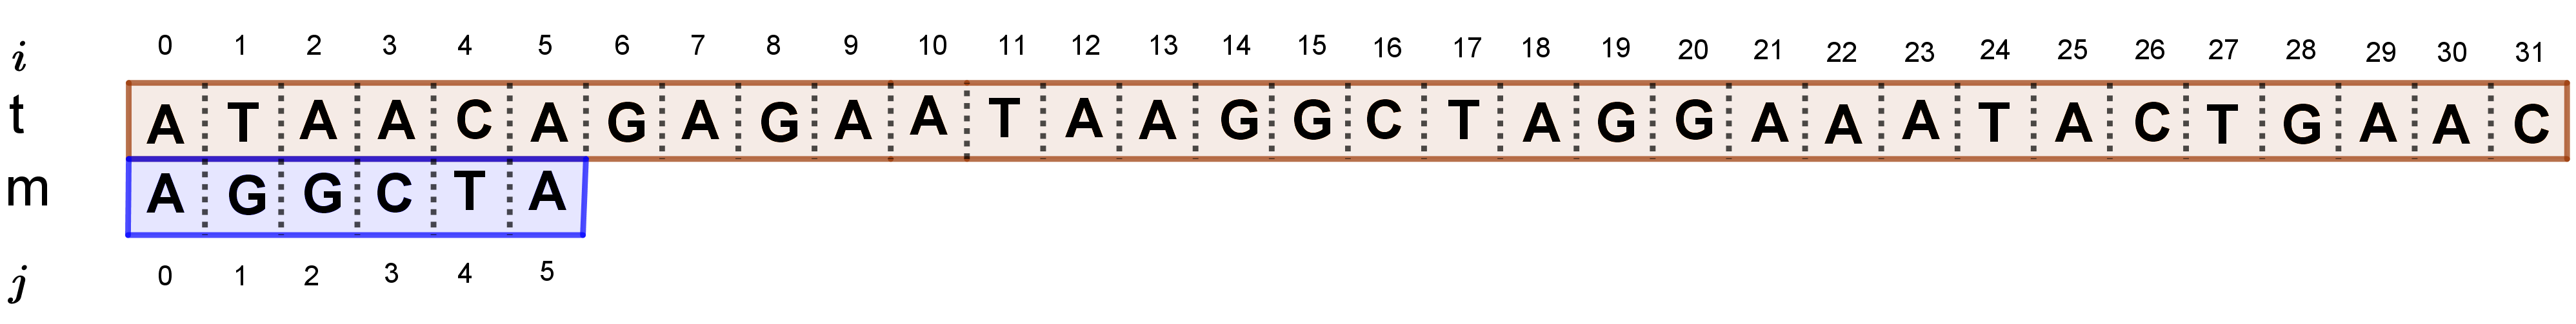

### 3. Prétraitement <a class="anchor" id="section_6_3"></a>

À travers l'exemple vu précédemment, on peut comprendre l'utilité de construire une première table qui indique la dernière position de chaque caractère, sauf le dernier, à la fin du texte.

Cette table ne dépend que du motif et pas du texte.

Ce pré-traitement est effectué une seule fois au début de la recherche. 
Par exemple pour le motif ATTCG la table serait :

| lettre | position | distance au dernier caractère |
| -- | -- | -- |
| A | 0 | 4
| T | 2 | 2
| C | 3 | 1

!!! question Créer la table de prétraitement

* Construire cette table pour le motif "AGGCTA".
* Construire la table permettant le prétraitement de "banane".
* Quelle structure de données paraît adaptée pour stocker le caractère et sa position maximale ?

!!!

### 4. Implémentation de la table de décalage <a class="anchor" id="section_6_4"></a>

!!! question Traduisez l'algorithme d'implémentation ci dessous.

* On commence par initialiser un dictionnaire vide qui contiendra les distances.
* Pour chaque lettre du mot, sauf la dernière on va stocker l'association lettre: position
* À la fin on renvoit le dictionnaire créé.

Testez-le sur les données de l'exercice 5.
!!!

??? tip Le code à trou
```python
def table_position(motif):
    d = ...
    for i in range(...):
        d[...] = ...
    return ...
```
???

In [ ]:
def table_position(motif):
    pass

In [ ]:
table_position('ATTCG')

In [ ]:
table_position('BANANE')

### 5. Implémentation de l'algorithme de Boyer-Moore<a class="anchor" id="section_6_5"></a>

Nous pouvons maintenant construire la fonction permettant de décaler notre motif du bon nombre de caractères.

!!! question Implémenter la fonction de décalage
Elle prend en paramètres la table de décalage, l'indice courant `j` et le caractère c à tester.
* Tout d'abord, on vérifie que `c` existe bien dans la table.
* Si c'est le cas, on doit se décaler de la différence entre `j` et la distance enregistrée.
* Sinon, on doit se décaler de `j+1` pour positionner le premier caractère à droite du caractère courant.
!!!

!!! danger Attention au décalage négatif
La différence entre `j` et la distance enregistrée peut être négative, dans ce cas on se décalera seulement de 1.
!!!

??? tip Le code à trou qui aide un peu

```python
def decalage(table,j,c):
    if c in ...:
        d = ... - ... # Attention, différence entre j et le caractère dans la table, pas l'inverse.
        if d <= ...:
            d = 1
    else:
        d = ...
    return d
```

???

In [ ]:
def decalage(table,j,c):
    '''utilise la table lorsque le caractère à l'indice j est c au lieu du caractère attendu'''
    ...

Il ne reste plus qu'à construire notre fonction <code>recherche_BM</code> qui prendra <code>motif</code> et <code>texte</code> en arguments.

Cette fonction commence par construire la table de décalages de <code>motif</code> avec la fonction <code>table_distance</code> puis elle teste les positions successives du motif dans le texte.

A chaque différence entre le motif et le texte, on calcule le décalage à faire pour l'indice $j$ grâce à la fonction <code>decalage</code>.

!!! question Complétez le code suivant.
Voici la dernière étape, le code vous est donné à vous de le compléter.
!!!

??? tip Une correction avec des affichages
```python
def recherche_BM(texte,motif):
    '''
    Renvoie l'indice de la première occurrence du motif dans le texte.
    '''
    table= table_distance(motif) # On fait le prétrairement du motif
    ind_texte=0 # l'indice qui va parcourir le texte est placé au début
    
    while ind_texte + len(motif)-1 < len(texte): # Tant que la lettre comparée avec la dernière du motif 
        # est valide dans le texte
        
        k=len(motif)-1 #l'indice dans le motif est placé à la fin (du motif)
        
        ### DEBUG
        print(texte)
        print('.'*(ind_texte+k)+'^')
        print(' '*ind_texte+motif)
        ### FIN DEBUG
        
        while k >= 0 and motif[k] == texte[ind_texte+k]:
            # Tant que k est valide et que les lettres sont les mêmes
            k = k - 1 # On décale k vers le début du motif
            
          
        if k < 0: # On est arrivé au début du motif, donc on a trouvé le mot
            return ind_texte
        else:
            # Sinon on doit appliquer un décalage à ind_texte
            # k est l'indice de la derniere lettre comparée, et texte[ind_texte+k] la lettre comparée.
            d = decalage(table,k,texte[ind_texte+k])
            # On ajoute le décalage pour la prochaine comparaison
            ind_texte += d
            
        ### DEBUG
        print('prochain décalage:',d)
        print('-'*len(texte))
        ### DEBUG
    return -1
```
???

In [ ]:
def recherche_BM(texte,motif):
    '''
    Renvoie l'indice de la première occurrence du motif dans le texte.
    '''
    table= ... # On fait le prétrairement du motif
    ind_texte=... # l'indice qui va parcourir le texte est placé au début
    
    while ind_texte + ... < ...: 
        # Tant que l'indice de la lettre comparée avec la dernière du motif est valide
        
        k=... #l'indice dans le motif est placé à la fin (du motif)
        
        while ... and motif[...] == texte[...]:
            # Tant que k est valide et que les lettres sont les mêmes
            k = ... # On décale k vers le début du motif
            
          
        if k < 0: # On est arrivé au début du motif, donc on a trouvé le mot
            return ...
        else:
            # Sinon on doit appliquer un décalage à ind_texte
            # k est l'indice de la derniere lettre comparée, et texte[ind_texte+k] la lettre comparée.
            d = decalage(...,...,...)
            # On ajoute le décalage pour la prochaine comparaison
            ind_texte = ...
    # Si on sort de la boucle, on a pas trouvé le mot.
    return ...

In [ ]:
print(recherche_BM("une magnifique maison bleue", "maison"))

print(recherche_BM("une magnifique maison bleue", "nsi"))

print(recherche_BM("une magnifique maison bleue", "maison bleue"))

print(recherche_BM("abracadabra brabrabrabru", 'rabru'))

## VI. Conclusion : Une vidéo récapitulative
Attention ça dure 15 minutes, à regarder chez vous.

In [ ]:
from IPython.display import HTML

# Youtube
HTML('<center><iframe width="560" height="315" src="https://www.youtube.com/embed/cjPv3fyarxU?rel=0&amp;controls=0&amp;showinfo=0" frameborder="0" allowfullscreen></iframe></center>')

## Appel à volontaires: En route vers l'oral

Il s'agit de préparer un petit exposé d'environ 10 minutes pour présenter l'un des différents algorithmes de recherche suivant ou un problème qui s'y rattache :

* recherche naïve
* Boyer-Moore (complet)
* Knuth-Morris-Pratt
* distance de Levenshtein
* Les automates à états finis pour résoudre l'appartenance.

Et pourquoi pas essayer de comparer l'implémentation en python, avec celle **de** python:

https://github.com/python/cpython/blob/dd44ab994b7262f0704d64996e0a1bc37b233407/Objects/stringlib/fastsearch.h#L550

## VIII. Pour aller plus loin : méthode du bon suffixe<a class="anchor" id="chapter9"></a>

L'algorithme de Boyer-Moore dispose d'une deuxième heuristique appelée du "bon suffixe", un tableau BS est utilisé dont chaque entrée BS[$i$] contient le décalage du motif en cas d'erreur de correspondance en position $i-1$, si le suffixe (la fin) du motif commençant position $i$ correspond.

<strong>Exercice</strong>
<p>En reprenant l'exemple précédent, appliquez à la main la règle du Bon Suffixe uniquement puis les règles Mauvais Caractère et Bon Suffixe. A t-on gagné en nombre de comparaison ?</p>

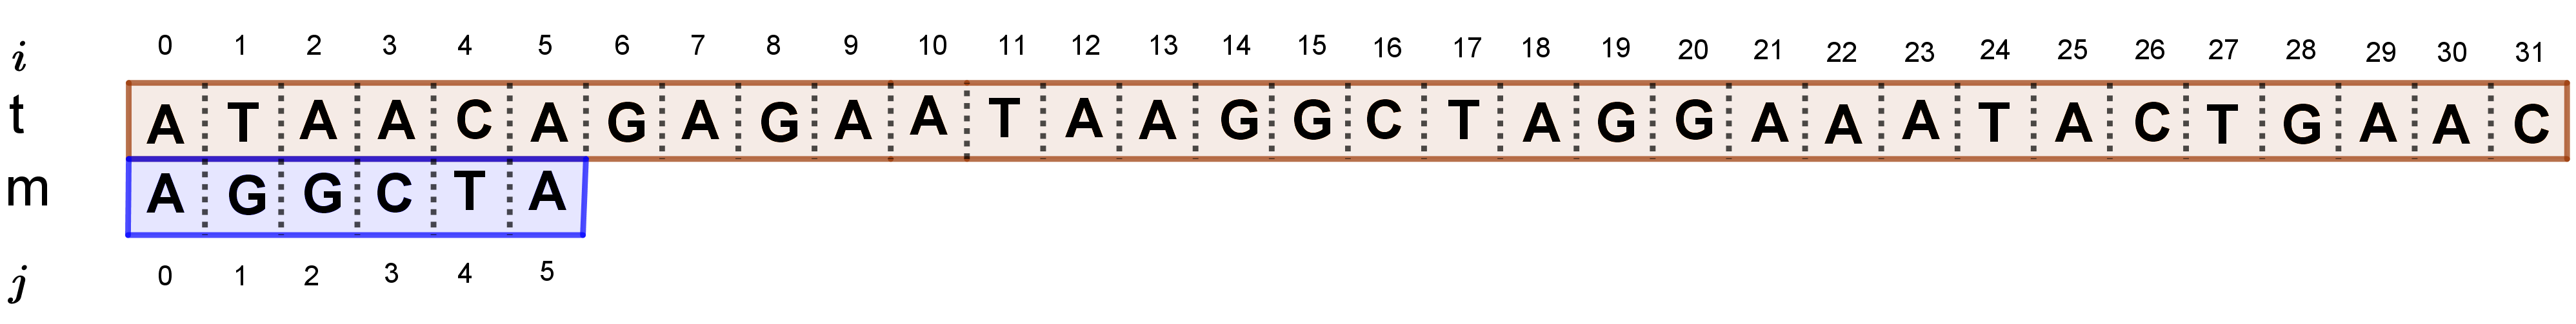

Le code pour remplir notre tableau BS est donné ci-dessous. Prenez-le temps de le comprendre et résumer en quelques lignes son fonctionnement.

In [ ]:
# calcul préalable de BS
# (attention, il s'agit probablement de l'implémentation la moins efficace
# mais peut-être la plus claire)

# calcul du plus grand préfixe qui est également suffixe (mais pas M tout entier)
pref_suff = m
for i in range(m-1):
    # on vérifie que la fin (entre m-(i+1) et m est identique au début (entre 0 et i+1)
    if M[0:i+1] == M[m-(i+1):m]:
        pref_suff = m-(i+1)
    
BS = [pref_suff] * m
BS[m-1] = 1 # cas particulier pour le dernier symbole de M
# recherche du prochain motif le plus à droite
i = m - 2
while (i >= 0):
    # motif à rechercher
    MM = M[i+1:m]
    l_MM = len(MM)
    k = i
    # on cherche le motif "à rebours"
    while (k>=0):
        if (M[k:k+l_MM] == MM) and ((k==0) or (M[k-1]!=M[i])):
            print("à l'index " + str(i) + " : sous-motif " + MM + " trouvé en " + str(k))
            BS[i] = i - k + 1
            break;
        k = k - 1
    i = i - 1

<strong>Exercice 10</strong>
<p>Ajouter la règle du Bon Suffixe à notre algorithme de Boyer-Moore version Horspool